Monte Carlo Class Usage Example from RocketPy
https://docs.rocketpy.org/en/latest/notebooks/monte_carlo_analysis/monte_carlo_class_usage.html 

In [1]:
# We import these lines for debugging purposes, only works on Jupyter Notebook
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import datetime

from rocketpy import Environment, Flight, Function, MonteCarlo, Rocket, SolidMotor
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticFlight,
    StochasticNoseCone,
    StochasticParachute,
    StochasticRailButtons,
    StochasticRocket,
    StochasticSolidMotor,
    StochasticTail,
    StochasticTrapezoidalFins,
)

In [3]:
# Nominal Object Creation
env = Environment(latitude=39.389700, longitude=-8.288964, elevation=113)
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
env.set_atmospheric_model(type="Ensemble", file="GEFS")

# Motor
motor = SolidMotor(
    thrust_source="../data/motors/cesaroni/Cesaroni_M1670.eng",
    dry_mass = 1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33/1000,
    grain_number = 5,
    grain_density = 1815,
    grain_outer_radius = 33/1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

print(f"Total Impulse of the Solid Motor: {motor.total_impulse} Ns")

# Rocket
rocket = Rocket(
    radius = 127/2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../data/rockets/calisto/powerOffDragCurve.csv",
    power_on_drag="../data/rockets/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = rocket.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position = -0.618,
    angular_position = 45,
)

rocket.add_motor(motor, position=-1.255)
nose_cone = rocket.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fin_set = rocket.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("../data/airfoils/NACA0012-radians.txt", "radians"),
)

tail = rocket.add_tail(
    top_radius=0.0635, bottom_radius=0.0435,length=0.060,position=-1.194656
)

# Recovery
Main = rocket.add_parachute(
    "Main",
    cd_s=10.0,
    trigger=800,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = rocket.add_parachute(
    "Drogue",
    cd_s=1.0,
    trigger = "apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0,8.3,0.5),
)

# Flight
test_flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=5,
    inclination=84,
    heading=133,
)

Total Impulse of the Solid Motor: 6026.35 Ns


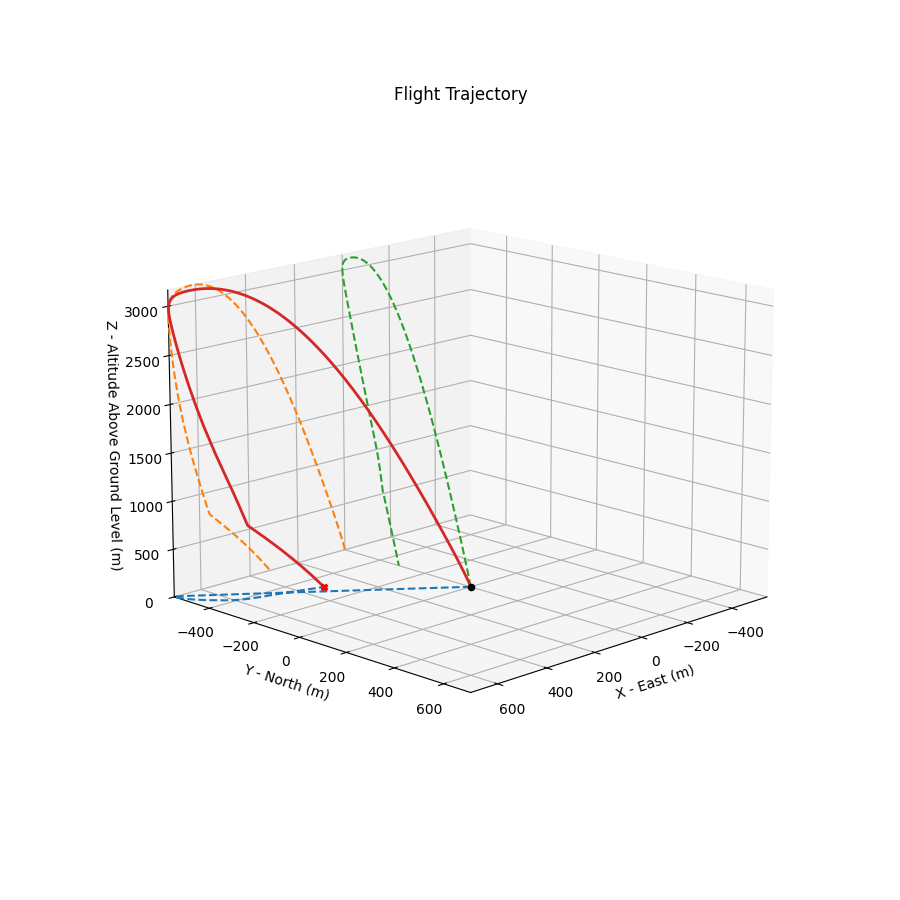

In [4]:
test_flight.plots.trajectory_3d()

Stochastic Objects

In [ ]:
# Stochastic Environment

stochastic_env = StochasticEnvironment(
    environment = env,
    ensemble_member = list(range(env.num_ensemble_members)),
)

stochastic_env.visualize_attributes()

Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                113
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	latitude                 39.3897
	longitude                -8.288964
	timezone                 UTC

Stochastic Attributes:
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)

Stochastic Attributes with choice of values:
	ensemble_member [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [6]:
wind_speed_at_1000m = []
for i in range(5):
    rnd_env = stochastic_env.create_object()
    wind_speed_at_1000m.append(rnd_env.wind_velocity_x(1000))

print(wind_speed_at_1000m)

[np.float64(-1.997957387622807), np.float64(-2.0755243960650054), np.float64(-1.8496709075606603), np.float64(-2.0240435608382863), np.float64(-2.5809846693486347)]


In [7]:
# Motor
stochastic_motor = StochasticSolidMotor(
    solid_motor=motor,
    burn_start_time = (0,0.1,"binomial"),
    grains_center_of_mass_position=0.001,
    grain_density=50,
    grain_separation=1 / 1000,
    grain_initial_height=1 / 1000,
    grain_initial_inner_radius=0.375 / 1000,
    grain_outer_radius=0.375 / 1000,
    total_impulse=(6500, 1000),
    throat_radius=0.5 / 1000,
    nozzle_radius=0.5 / 1000,
    nozzle_position=0.001,
)
stochastic_motor.visualize_attributes()

Reporting the attributes of the `StochasticSolidMotor` object:

Constant Attributes:
	burn_out_time                    3.9
	center_of_dry_mass_position      0.317
	coordinate_system_orientation    nozzle_to_combustion_chamber
	dry_I_11                         0.125
	dry_I_12                         0
	dry_I_13                         0
	dry_I_22                         0.125
	dry_I_23                         0
	dry_I_33                         0.002
	dry_mass                         1.815
	grain_number                     5
	interpolate                      linear
	thrust_source                    [[0, 0], [0.055, 100.0], [0.092, 1500.0], [0.1, 2000.0], [0.15, 2200.0], [0.2, 1800.0], [0.5, 1950.0], [1.0, 2034.0], [1.5, 2000.0], [2.0, 1900.0], [2.5, 1760.0], [2.9, 1700.0], [3.0, 1650.0], [3.3, 530.0], [3.4, 350.0], [3.9, 0.0]]

Stochastic Attributes:
	burn_start_time                  0.00000 ± 0.10000 (binomial)
	grain_density                    1815.00000 ± 50.00000 (normal)
	grain_ini

In [8]:
total_impulse = []
for i in range(5):
    rnd_motor = stochastic_motor.create_object()
    total_impulse.append(rnd_motor.total_impulse)

print(total_impulse)

[np.float64(5451.8087655219915), np.float64(6745.0006880078145), np.float64(6610.4713152836275), np.float64(8155.191552964647), np.float64(6842.856571451796)]


In [9]:
# Rocket
stochastic_rocket = StochasticRocket(
    rocket = rocket,
    radius = 0.0127/1000,
    mass = (15.426, 0.5, "normal"),
    inertia_11=(6.321, 0),
    inertia_22=0.01,
    inertia_33 = 0.01,
    center_of_mass_without_motor=0,
)
stochastic_rocket.visualize_attributes()

Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_12_without_motor              0
	I_13_without_motor              0
	I_23_without_motor              0
	coordinate_system_orientation   tail_to_nose
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)
	power_on_drag                   Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)

Stochastic Attributes:
	I_11_without_motor              6.32100 ± 0.00000 (normal)
	I_22_without_motor              6.32100 ± 0.01000 (normal)
	I_33_without_motor              0.03400 ± 0.01000 (normal)
	center_of_mass_without_motor    0.00000 ± 0.00000 (normal)
	mass                            15.42600 ± 0.50000 (normal)
	power_off_drag_factor           1.00000 ± 0.00000 (normal)
	power_on_drag_factor            1.00000 ± 0.00000 (normal)
	radius                          0.06350 ± 0.00001 (normal)


In [ ]:
stochastic_nose_cone = StochasticNoseCone(
    nosecone=nose_cone,
    length=0.001,
)

stochastic_fin_set = StochasticTrapezoidalFins(
    trapezoidal_fins=fin_set,
    root_chord=0.0005,
    tip_chord=0.0005,
    span=0.0005,
)

stochastic_tail = StochasticTail(
    tail=tail,
    top_radius=0.001,
    bottom_radius=0.001,
    length=0.001,
)

stochastic_rail_buttons = StochasticRailButtons(
    rail_buttons=rail_buttons, buttons_distance=0.001
)

stochastic_main = StochasticParachute(
    parachute=Main,
    cd_s=0.1,
    lag=0.1,
)

stochastic_drogue = StochasticParachute(
    parachute=Drogue,
    cd_s=0.07,
    lag=0.2,
)

stochastic_rocket.add_motor(stochastic_motor, position=0.001)
stochastic_rocket.add_nose(stochastic_nose_cone, position=(1.134, 0.001))
stochastic_rocket.add_trapezoidal_fins(stochastic_fin_set, position=(0.001, "normal"))
stochastic_rocket.add_tail(stochastic_tail)
stochastic_rocket.set_rail_buttons(
    stochastic_rail_buttons, lower_button_position=(0.001, "normal")
)
stochastic_rocket.add_parachute(stochastic_main)
stochastic_rocket.add_parachute(stochastic_drogue)

stochastic_rocket.visualize_attributes()

Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_12_without_motor              0
	I_13_without_motor              0
	I_23_without_motor              0
	coordinate_system_orientation   tail_to_nose
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)
	power_on_drag                   Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)

Stochastic Attributes:
	I_11_without_motor              6.32100 ± 0.00000 (normal)
	I_22_without_motor              6.32100 ± 0.01000 (normal)
	I_33_without_motor              0.03400 ± 0.01000 (normal)
	center_of_mass_without_motor    0.00000 ± 0.00000 (normal)
	mass                            15.42600 ± 0.50000 (normal)
	power_off_drag_factor           1.00000 ± 0.00000 (normal)
	power_on_drag_factor            1.00000 ± 0.00000 (normal)
	radius                          0.06350 ± 0.00001 (normal)


In [11]:
# Flight
stochastic_flight = StochasticFlight(
    flight=test_flight,
    inclination=(84.7, 1),
    heading = (53, 2),
)

stochastic_flight.visualize_attributes()

Reporting the attributes of the `StochasticFlight` object:

Constant Attributes:
	rail_length           5

Stochastic Attributes:
	heading               53.00000 ± 2.00000 (normal)
	inclination           84.70000 ± 1.00000 (normal)


Starting Monte Carlo Simulations

In [15]:
test_dispersion = MonteCarlo(
    filename="MonteCarlo/example_outputs",
    environment = stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight,
)

test_dispersion.simulate(
    number_of_simulations=100,
    append=False,
    include_function_data=False,
    parallel=True,
    n_workers = 10,
)

The following input file was imported: MonteCarlo\example_outputs.inputs.txt
A total of 0 simulations results were loaded from the following output file: MonteCarlo\example_outputs.outputs.txt

The following error file was imported: MonteCarlo\example_outputs.errors.txt                                        
Starting Monte Carlo analysis                                               
Running Monte Carlo simulation with 10 workers.
Results saved to MonteCarlo\example_outputs.outputs.txt


Visualizing Results of MonteCarlo Sim

In [16]:
test_dispersion.num_of_loaded_sims
test_dispersion.prints.all()

Monte Carlo Simulation by RocketPy
Data Source:  MonteCarlo\example_outputs
Number of simulations:  100
Results: 

                Parameter            Mean          Median       Std. Dev.    95% PI Lower    95% PI Upper
--------------------------------------------------------------------------------------------------------------
          impact_velocity          -5.370          -5.367           0.082          -5.519          -5.221
                 apogee_x         623.078         626.523         135.952         346.090         895.013
         out_of_rail_time           0.361           0.360           0.024           0.324           0.417
                 x_impact         356.181         344.060         169.924          94.836         718.206
 initial_stability_margin           2.586           2.597           0.073           2.419           2.690
     out_of_rail_velocity          25.643          25.564           1.989          21.414          29.128
out_of_rail_stability_margin    

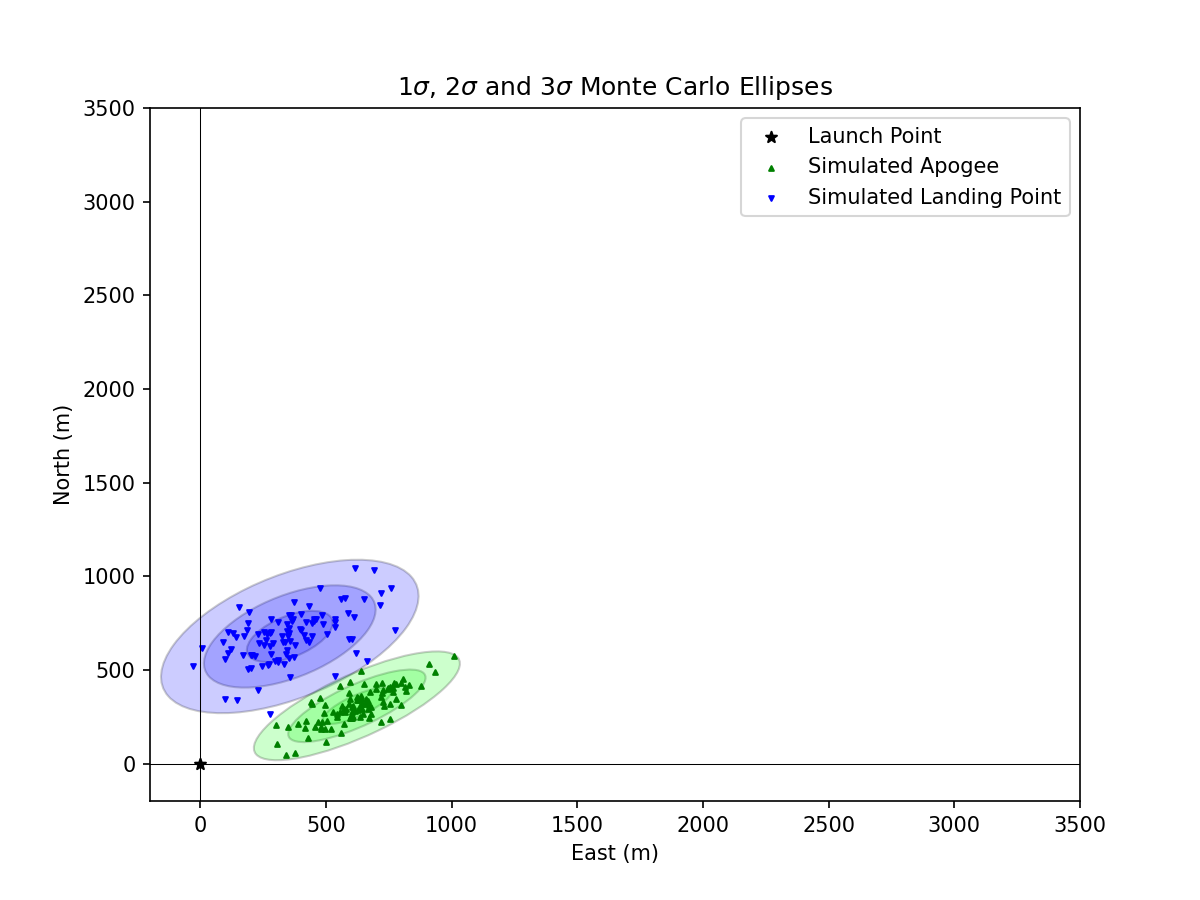

In [17]:
test_dispersion.plots.ellipses(xlim=(-200, 3500), ylim=(-200, 3500))